讀取信用卡的資料。補充說明：信用交易記錄檔（trade_data）是已經先用excel的排序功能將每
一位消費者的資料整理出來，並按照交易日期進行排序，以方便之後的資料運算。

In [3]:
customer_data=pd.read_excel("/Users/tyllersun/Desktop/大一/大數據行銷/信用卡資料.xlsx",sheet_name="客戶資料檔")
print(customer_data.head())
card_data=pd.read_excel("/Users/tyllersun/Desktop/大一/大數據行銷/信用卡資料.xlsx",sheet_name="信用卡資料檔")
trade_data=pd.read_excel("/Users/tyllersun/Desktop/大一/大數據行銷/信用卡資料.xlsx",sheet_name="信用卡交易記錄檔")
trade_data=pd.DataFrame(trade_data)

   客戶ID  年齡         生日    居住地 教育程度   性別 婚姻狀況    職業 辦第一張信用卡的時間
0    89  59 1953-09-21  大台北地區   學士  1:男   已婚  白領主管 2003-11-27
1   106  63 1949-10-27  大台北地區   專科  1:男   已婚  白領主管 2003-11-10
2   131  69 1943-11-13  大台北地區   學士  1:男   已婚    其他 2002-11-07
3   179  64 1948-08-02  大台北地區   學士  1:男   已婚  白領主管 2002-09-23
4   261  56 1956-12-01  大台北地區   專科  1:男   已婚   自由業 2003-10-13


在此步驟中我去檢測了購買資料中的客戶ID是否與下個相同，如果相同表示為同一位故可所購買，則可以合併去運算，
若不相同則分開計算，如此一來可以算出每一位顧客的平均消費頻率、平均刷卡金額，也可以從資料中得知他上次購買
的時間為何，方便之後CRM模型的建構。

In [5]:
customer=list()
last_buy=list()
fre=list()
monetary=list()
purchase_time=list()
for i in range(len(trade_data)):
    if i==0 or trade_data["客戶ID"][i]!=trade_data["客戶ID"][i-1]:
        customer.append(trade_data["客戶ID"][i])
        last_buy.append(trade_data["刷卡日期"][i])
        time=0
        last=trade_data["刷卡日期"][i]
        money=trade_data["刷卡金額"][i]
    #print(i)
    if i!=0:
        if ((trade_data["客戶ID"][i]==trade_data["客戶ID"][i-1])):
                time=time+1
                money=money+trade_data["刷卡金額"][i]
        try:
            if trade_data["客戶ID"][i]!=trade_data["客戶ID"][i+1]:
                before=trade_data["刷卡日期"][i]
                #print(before)
                #print(last)
                #print(trade_data["客戶ID"][i])
                #print("last",last)
                #print("before",before)
                delta=int(str(last-before).split(" ")[0])
                #print(trade_data["客戶ID"][i])
                #print(delta)
                #print("time",time)
                time=time+1
                if delta==0:
                    fre.append(0)
                else:
                    fre.append(time/(delta))
                money=money/time
                monetary.append(money)
                purchase_time.append(time)
        except:
            before=trade_data["刷卡日期"][i]
            delta=int(str(last-before).split(" ")[0])
            time=time+1
            
            if delta==0:
                fre.append(0)
                purchase_time.append(time)
            else:
                fre.append(time/(delta))
                purchase_time.append(time)
            money=money/time
            monetary.append(money)
#print(fre)
#print(len(customer))
#print(len(last_buy))
#print(len(fre))
#print(len(monetary))
#print(len(purchase_time))

在以下步驟中，我將上面所計算出來的資料對應到每一位顧客中，並添入原本的資料表中。
<br >上次購買時間：last buy
<br >平均購買頻率：frequency
<br >平均購買金額：monetary
<br >購買次數：purchase time
<br >以下也印出目前excel表格中所呈現的狀況。

In [8]:
CRM=pd.DataFrame(customer_data)
#CRM["customer ID"]=customer
CRM["last buy"]=last_buy
CRM["frequency"]=fre
CRM["monetary"]=monetary
CRM["purchase time"]=purchase_time
CRM

,客戶ID,年齡,生日,居住地,教育程度,性別,婚姻狀況,職業,辦第一張信用卡的時間,last buy,frequency,monetary,purchase time
0,89,59,1953-09-21,大台北地區,學士,1:男,已婚,白領主管,2003-11-27,2012-11-12,0.121602,1772.717647,85
1,106,63,1949-10-27,大台北地區,專科,1:男,已婚,白領主管,2003-11-10,2012-11-23,0.105042,1202.560000,75
2,131,69,1943-11-13,大台北地區,學士,1:男,已婚,其他,2002-11-07,2011-10-27,0.048632,4347.375000,16
3,179,64,1948-08-02,大台北地區,學士,1:男,已婚,白領主管,2002-09-23,2012-02-15,0.009070,2295.500000,4
4,261,56,1956-12-01,大台北地區,專科,1:男,已婚,自由業,2003-10-13,2011-12-13,0.036415,1524.230769,13
5,605,46,1966-06-04,大台北地區,高中,1:男,已婚,藍領(勞動工作或作業員)一般職員,2003-02-07,2012-11-28,1.311813,96.606283,955
6,773,45,1967-11-23,大台北地區,學士,1:男,已婚,白領一般職員,2003-11-21,2012-11-21,0.037037,2163.230769,26
7,861,41,1971-01-22,大台北地區,學士,1:男,已婚,白領主管,2002-12-03,2012-10-15,0.132440,12051.640449,89
8,867,47,1965-10-28,大台北地區,高中,1:男,已婚,白領主管,2002-10-11,2012-11-19,0.023697,2701.733333,15
9,920,39,1973-05-29,大台北地區,學士,1:男,已婚,自營事業老闆,2010-03-05,2012-11-13,0.169034,2918.033613,119


以下模型為五等均分法的給分方式。共分為五個階級，如果落於排名前前20%的我給五分，以此類推，最低分為1分。給分的布地主要是為了有一個更好的量化指標，方便計算算出每一位顧客的CRM指標。

In [10]:
def give_score(data,total):
    score=list()
    for i in range(total):
        #print(i)
        #print(i,data[i])
        if data[i]>=0.8*total:
            score.append("5")
        elif data[i]>=0.6*total:
            score.append("4")
        elif data[i]>=0.4*total:
            score.append("3")
        elif data[i]>=0.2*total:
            score.append("2")
        else:
            score.append("1")
    #print(score)
    return score
    

CRM["fre_rank"]=CRM["frequency"].rank()
CRM["frequency point"]=give_score(CRM["fre_rank"],len(CRM["fre_rank"]))
CRM["monetary_rank"]=CRM["monetary"].rank()
CRM["monetary point"]=give_score(CRM["monetary_rank"],len(CRM["monetary_rank"]))
CRM["last buy_rank"]=CRM["last buy"].rank()
CRM["last buy point"]=give_score(CRM["last buy_rank"],len(CRM["last buy_rank"]))
score=list()
for i in range(len(CRM)):
    score.append(int(CRM["frequency point"][i])+int(CRM["last buy point"][i])+int(CRM["monetary point"][i]))
CRM["CRM score"]=score 

以下表格很明顯的可以看出每一位顧客在每一個向度上的排名和其所對應到的分數，最後由三項度的分數加總計算出每一位顧客的CRM分數和其排名

In [11]:
CRM["CRM rank"]=CRM["CRM score"].rank(ascending=False, method='max')
CRM

,客戶ID,年齡,生日,居住地,教育程度,性別,婚姻狀況,職業,辦第一張信用卡的時間,last buy,...,monetary,purchase time,fre_rank,frequency point,monetary_rank,monetary point,last buy_rank,last buy point,CRM score,CRM rank
0,89,59,1953-09-21,大台北地區,學士,1:男,已婚,白領主管,2003-11-27,2012-11-12,...,1772.717647,85,64.0,4,52.0,3,43.5,3,10,48.0
1,106,63,1949-10-27,大台北地區,專科,1:男,已婚,白領主管,2003-11-10,2012-11-23,...,1202.560000,75,58.0,3,31.0,2,58.0,3,8,70.0
2,131,69,1943-11-13,大台北地區,學士,1:男,已婚,其他,2002-11-07,2011-10-27,...,4347.375000,16,39.0,2,89.0,5,5.0,1,8,70.0
3,179,64,1948-08-02,大台北地區,學士,1:男,已婚,白領主管,2002-09-23,2012-02-15,...,2295.500000,4,4.0,1,62.0,4,11.0,1,6,91.0
4,261,56,1956-12-01,大台北地區,專科,1:男,已婚,自由業,2003-10-13,2011-12-13,...,1524.230769,13,28.0,2,43.0,3,7.0,1,6,91.0
5,605,46,1966-06-04,大台北地區,高中,1:男,已婚,藍領(勞動工作或作業員)一般職員,2003-02-07,2012-11-28,...,96.606283,955,100.0,5,1.0,1,83.0,5,11,32.0
6,773,45,1967-11-23,大台北地區,學士,1:男,已婚,白領一般職員,2003-11-21,2012-11-21,...,2163.230769,26,30.0,2,59.0,3,52.0,3,8,70.0
7,861,41,1971-01-22,大台北地區,學士,1:男,已婚,白領主管,2002-12-03,2012-10-15,...,12051.640449,89,67.0,4,98.0,5,27.5,2,11,32.0
8,867,47,1965-10-28,大台北地區,高中,1:男,已婚,白領主管,2002-10-11,2012-11-19,...,2701.733333,15,18.0,1,69.0,4,50.5,3,8,70.0
9,920,39,1973-05-29,大台北地區,學士,1:男,已婚,自營事業老闆,2010-03-05,2012-11-13,...,2918.033613,119,79.0,4,74.0,4,46.0,3,11,32.0


以下我發現到與CRM指標有較大關係的為職業類別，其他比較沒有較大的顯著差異

In [75]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
myfont = FontProperties(fname=r'/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc')
# import matplotlib.pyplot as plt
# x = ['basketball', 'swim', 'take photos', 'reading', 'guitar']
# class_a = [8, 7, 1, 6, 5]
# class_b = [12, 2, 9, 5, 3]
# plt.bar(x, class_a, label = 'class_a')
total=list()
locate_CRM=CRM.groupby("居住地")
b=locate_CRM["CRM score"].sum()/locate_CRM["客戶ID"].count()
for i in range(len(b)):
    total.append(b[i])
locate_to_score=pd.DataFrame()
locate_to_score["居住地"]=b.index
locate_to_score["分數"]=total
locate_to_score.to_excel("/Users/tyllersun/Desktop/大一/大數據行銷/job.xlsx",sheet_name="1")

job_CRM=CRM.groupby("職業")
total=list()
a=job_CRM["CRM score"].sum()/job_CRM["客戶ID"].count()
a.index
for i in range(len(a)):
    total.append(a[i])
#plt.title(u'消费性别倾向', fontproperties = myfont)
#plt.bar(a.index,total)
#print(locate_CRM["CRM score"].head())
#plt.bar()
job_to_score=pd.DataFrame()
job_to_score["職業"]=a.index
job_to_score["分數"]=total
job_to_score.to_excel("/Users/tyllersun/Desktop/大一/大數據行銷/job.xlsx",sheet_name="2")
job_CRM=CRM.groupby("性別")
total=list()
c=job_CRM["CRM score"].sum()/job_CRM["客戶ID"].count()
c
job_CRM=CRM.groupby("教育程度")
d=job_CRM["CRM score"].sum()/job_CRM["客戶ID"].count()
d

教育程度
其他         9.000000
初中及初中以下    8.500000
學士         8.888889
專科         9.526316
研究所以上      9.916667
高中         9.000000
dtype: float64

<br>
以下利用Bob Stone法給出另一個CRM分數，給分方式為：
<br>recency points
<br>------------------
<br>current quarter 24
<br>last 6 month 12
<br>last 9 month 6
<br>last 12 month 3
<br>
<br>Frequency points
<br>------------------
<br>number of purchases*4
<br>
<br>Monetary points
<br>------------------
<br>10 percent of dollar purchase with a ceiling 9 point

In [12]:
#2012/12/31
from datetime import datetime
text="2012-12-31"
quarter=92
score=list()
def get_recency_point(data):
    for i in range(len(data)):
        new_date=str(data[i]).split(" ")[0]
        #print(new_date)
        #date = datetime.strftime(data[i],'%Y-%m-%d')
        #print(type(datetime.date(data[i])))
        #print(type(ending_day))
        new_date=datetime.strptime(new_date, '%Y-%m-%d')
        ending_day=datetime.strptime(text,"%Y-%m-%d")
        day=ending_day-new_date
        #print(day)
        day=int(str(day).split(" ")[0])
        #print(day)
        if day >=4*quarter:
            score.append(3)
        elif day>=3*quarter:
            score.append(6)
        elif day>=2*quarter:
            score.append(12)
        else :
            score.append(24)
    return score

def get_frequency_point(data):
    score=list()
    for i in range(len(data)):
        score.append(data[i]*4)
    return score

def get_monetary_point(data):
    score=list()
    for i in range(len(data)):
        grade=0
        grade=data[i]/10
        if grade>9:
            grade=9
        score.append(grade)
    return score
CRM["BRP"]=get_recency_point(CRM["last buy"])
CRM["BFP"]=get_frequency_point(CRM["purchase time"])
CRM["BMF"]=get_monetary_point(CRM["monetary"])
BTS=list()
for i in range(len(CRM)):
    BTS.append(int(CRM["BRP"][i])+int(CRM["BFP"][i])+int(CRM["BMF"][i]))
CRM["BTS"]=BTS
CRM["BTS rank"]=CRM["BTS"].rank(ascending=False, method='max')
CRM

,客戶ID,年齡,生日,居住地,教育程度,性別,婚姻狀況,職業,辦第一張信用卡的時間,last buy,...,monetary point,last buy_rank,last buy point,CRM score,CRM rank,BRP,BFP,BMF,BTS,BTS rank
0,89,59,1953-09-21,大台北地區,學士,1:男,已婚,白領主管,2003-11-27,2012-11-12,...,3,43.5,3,10,48.0,24,340,9,373,29.0
1,106,63,1949-10-27,大台北地區,專科,1:男,已婚,白領主管,2003-11-10,2012-11-23,...,2,58.0,3,8,70.0,24,300,9,333,34.0
2,131,69,1943-11-13,大台北地區,學士,1:男,已婚,其他,2002-11-07,2011-10-27,...,5,5.0,1,8,70.0,3,64,9,76,77.0
3,179,64,1948-08-02,大台北地區,學士,1:男,已婚,白領主管,2002-09-23,2012-02-15,...,4,11.0,1,6,91.0,6,16,9,31,98.0
4,261,56,1956-12-01,大台北地區,專科,1:男,已婚,自由業,2003-10-13,2011-12-13,...,3,7.0,1,6,91.0,3,52,9,64,85.0
5,605,46,1966-06-04,大台北地區,高中,1:男,已婚,藍領(勞動工作或作業員)一般職員,2003-02-07,2012-11-28,...,1,83.0,5,11,32.0,24,3820,9,3853,1.0
6,773,45,1967-11-23,大台北地區,學士,1:男,已婚,白領一般職員,2003-11-21,2012-11-21,...,3,52.0,3,8,70.0,24,104,9,137,60.0
7,861,41,1971-01-22,大台北地區,學士,1:男,已婚,白領主管,2002-12-03,2012-10-15,...,5,27.5,2,11,32.0,24,356,9,389,26.0
8,867,47,1965-10-28,大台北地區,高中,1:男,已婚,白領主管,2002-10-11,2012-11-19,...,4,50.5,3,8,70.0,24,60,9,93,71.0
9,920,39,1973-05-29,大台北地區,學士,1:男,已婚,自營事業老闆,2010-03-05,2012-11-13,...,4,46.0,3,11,32.0,24,476,9,509,14.0


以下我利用散布的方式畫出Bob Stone法和五等均分法的圖型，我發現到如果用5等均分法的話會有較多的
客戶得到相同的分數，因此我認為Bob Stone法可以比較容易看出每一個客戶的差異。

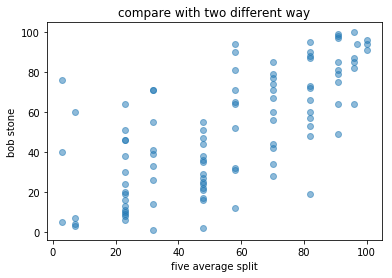

In [171]:
import matplotlib.pyplot as plt
plt.scatter(CRM["CRM rank"], CRM["BTS rank"], alpha=.5)
plt.title("compare with two different way")
plt.xlabel("five average split")
plt.ylabel("bob stone")
plt.show()

In [165]:
CRM.to_excel("/Users/tyllersun/Desktop/大一/大數據行銷/CRM.xlsx")